In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)#for ignoring warning
import warnings
warnings.filterwarnings('ignore')#음수표시
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
matplotlib.rc("axes", unicode_minus = False)
plt.rcParams["font.family"] = 'NanumGothic'

# 데이터 읽기

In [2]:
df_raw = pd.read_csv('tele_customer_final.csv')
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerId            6863 non-null   object 
 1   Gender                6863 non-null   object 
 2   Age                   6863 non-null   int64  
 3   AgeGroup              6863 non-null   object 
 4   Married               6863 non-null   object 
 5   Dependents            6863 non-null   object 
 6   noDependents          6863 non-null   int64  
 7   Referrals             6863 non-null   object 
 8   noReferrals           6863 non-null   int64  
 9   PaperlessBilling      6863 non-null   object 
 10  PaymentMethod         6863 non-null   object 
 11  OnlineSecurity        6863 non-null   object 
 12  OnlineBackup          6863 non-null   object 
 13  TechSupport           6863 non-null   object 
 14  UnlimitedData         6863 non-null   object 
 15  AvgDownloadGB        

# 이탈시기 (y = Tenure_month)

## Churn한 사람을 바탕으로 예측 학습

In [3]:
df_raw_churn = df_raw[df_raw['ChurnLabel'] == 'Yes']
df_raw_churn.reset_index(inplace = True)
df_raw_churn = df_raw_churn.iloc[:,1:]

# 필요없는 것 빼기

## df_raw_drop하고 과금액용

In [4]:
df_raw_tm = df_raw_churn.drop(['CustomerId', 'StartDate', 'EndDate', 'EndDateTmp', 'SatisScore', \
                               'ChurnCategory', 'ChurnLabel', 'ChurnReason', 'AvgRoamCharge', 'ReasonCategory', \
                               'Sum_charge', 'TotalRoamCharge'], axis = 1, inplace = False)


## df_raw_tm_dummy는 df_raw_tm 더미화  

In [5]:
#get dummy
df_raw_tm_dummy = pd.get_dummies(df_raw_tm)

In [6]:
df_raw_tm_dummy

,Age,noDependents,noReferrals,AvgDownloadGB,ChurnScore,CustomerLTV,TotalExtraDataCharge,Tenure_month,Monthly_charge,Gender_남성,...,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,UnlimitedData_No,UnlimitedData_Yes
0,50,0,0,30,71,4479,0,5,98180.000000,1,...,0,0,1,0,1,0,1,0,0,1
1,78,0,1,4,99,3714,0,14,112742.857143,1,...,0,0,1,0,0,1,1,0,0,1
2,75,0,3,11,68,3464,0,4,94500.000000,0,...,1,0,1,0,1,0,0,1,0,1
3,79,0,0,17,92,2654,0,46,73113.043478,1,...,1,0,0,1,1,0,1,0,0,1
4,67,0,0,9,85,5437,0,2,27800.000000,1,...,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,79,0,0,7,87,4317,0,22,113254.545455,1,...,0,0,1,0,1,0,1,0,0,1
1697,73,0,0,13,71,3723,0,10,97190.000000,1,...,0,0,1,0,1,0,1,0,0,1
1698,53,0,0,9,97,5773,0,2,77550.000000,0,...,1,0,1,0,1,0,1,0,0,1
1699,36,0,0,0,85,5822,0,5,23660.000000,0,...,0,0,1,0,1,0,1,0,1,0


# Data_split

## df_raw_cp

In [7]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_tm_x = df_raw_tm_dummy.drop("Tenure_month", axis = 1, inplace = False) #목표변수 외
df_raw_tm_y = df_raw_tm_dummy["Tenure_month"] #목표변수ch

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_tm_x, df_raw_tm_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_tm_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_tm_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (1701, 36)
분할 후 설명변수 데이터 : (1020, 36) 
 Test (681, 36)


# VF를 위한 `의사결정 나무`

In [8]:
tree_uncustomized = DecisionTreeRegressor(random_state = 42)
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor(random_state=42)

In [9]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


In [10]:
#기본 설며ㅇ력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: -0.113


In [11]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state = 42, \
                                   max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [12]:
#depth 6 설명력
#train data 설명력
print("Score on training set: {:.3f}".format(tree_graph.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_graph.score(df_test_x, df_test_y)))

Score on training set: 0.581
Score on test set: 0.292


In [13]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_graph.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,Monthly_charge,0.485
5,CustomerLTV,0.254
2,noReferrals,0.096
31,OnlineBackup_Yes,0.041
3,AvgDownloadGB,0.034
30,OnlineBackup_No,0.030
6,TotalExtraDataCharge,0.022
0,Age,0.014
4,ChurnScore,0.011
18,Married_Yes,0.009


Text(0, 0.5, '변수')

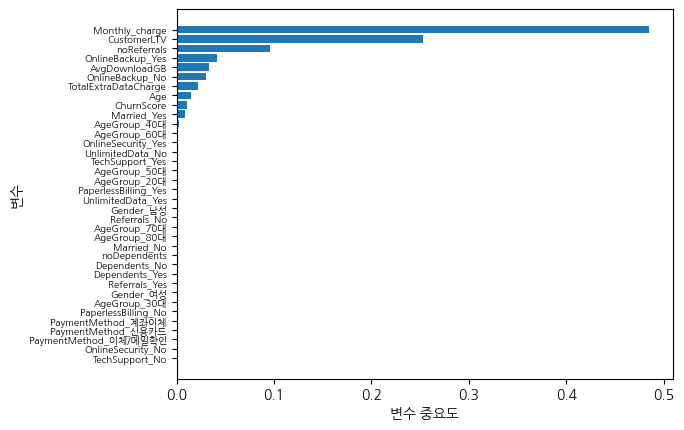

In [14]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `RF`

In [15]:
rf_uncustomized = RandomForestRegressor(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.916
Score on test set: 0.357


In [16]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

In [17]:
rf_test = RandomForestRegressor(random_state = 42, max_depth = 6)
rf_test.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_test.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_test.score(df_test_x, df_test_y)))

Score on training set: 0.653
Score on test set: 0.370


In [18]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,Monthly_charge,0.423
5,CustomerLTV,0.211
31,OnlineBackup_Yes,0.044
0,Age,0.039
30,OnlineBackup_No,0.038
4,ChurnScore,0.036
2,noReferrals,0.036
3,AvgDownloadGB,0.023
17,Married_No,0.019
18,Married_Yes,0.019


Text(0, 0.5, '변수')

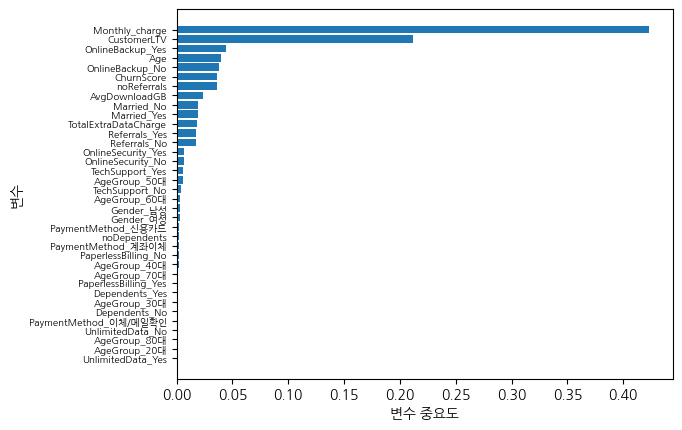

In [19]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF를 위한 `GB`

In [20]:
#모델 생성: GradientBoostingClassifier
gb_uncustomized = GradientBoostingRegressor(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.685
Score on test set: 0.376


In [21]:
gb_test = GradientBoostingRegressor(random_state = 42, max_depth = 6)
gb_test.fit(df_train_x, df_train_y)

#Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_test.score(df_train_x, df_train_y)))
#Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_test.score(df_test_x, df_test_y)))

Score on training set: 0.953
Score on test set: 0.338


In [22]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_test.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,Monthly_charge,0.364
5,CustomerLTV,0.218
0,Age,0.060
4,ChurnScore,0.052
3,AvgDownloadGB,0.045
30,OnlineBackup_No,0.037
21,Referrals_No,0.030
6,TotalExtraDataCharge,0.026
31,OnlineBackup_Yes,0.021
2,noReferrals,0.017


Text(0, 0.5, '변수')

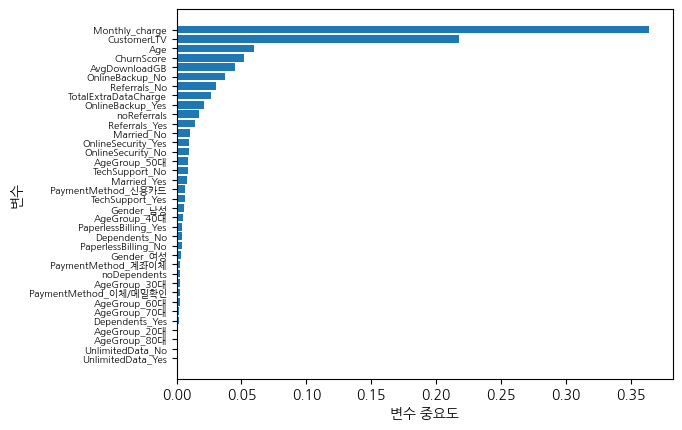

In [23]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize = 7)
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# VF 최종 변수

- RF로만 나머지는 설명력 너무 안좋음
Monthly_charge, CustomerLTV, AvgDownloadGB, ChurnScore, Age, noReferrals, OnlineBackup, Married

# 새롭게 산출된 Data

In [24]:
df_raw_fintm = pd.DataFrame()

최종 데이터

In [25]:
df_raw_fintm['Monthly_charge'] = df_raw_tm['Monthly_charge']
df_raw_fintm['CustomerLTV'] = df_raw_tm['CustomerLTV']
df_raw_fintm['AvgDownloadGB'] = df_raw_tm['AvgDownloadGB']
df_raw_fintm['ChurnScore'] = df_raw_tm['ChurnScore']
df_raw_fintm['OnlineBackup'] = df_raw_tm['OnlineBackup']
df_raw_fintm['Age'] = df_raw_tm['Age']
df_raw_fintm['noReferrals'] = df_raw_tm['noReferrals']
df_raw_fintm['Married'] = df_raw_tm['Married']

df_raw_fintm['Tenure_month'] = df_raw_tm['Tenure_month']

df_raw_fintm

,Monthly_charge,CustomerLTV,AvgDownloadGB,ChurnScore,OnlineBackup,Age,noReferrals,Married,Tenure_month
0,98180.000000,4479,30,71,No,50,0,No,5
1,112742.857143,3714,4,99,Yes,78,1,Yes,14
2,94500.000000,3464,11,68,No,75,3,Yes,4
3,73113.043478,2654,17,92,No,79,0,No,46
4,27800.000000,5437,9,85,No,67,0,No,2
...,...,...,...,...,...,...,...,...,...
1696,113254.545455,4317,7,87,No,79,0,No,22
1697,97190.000000,3723,13,71,No,73,0,No,10
1698,77550.000000,5773,9,97,No,53,0,No,2
1699,23660.000000,5822,0,85,No,36,0,No,5


In [26]:
#get dummy
df_raw_fintm_dummy = pd.get_dummies(df_raw_fintm)

## 최종 DT, RF, GB에 쓸 데이터 -> df_raw_fincp_dummy

In [27]:
df_raw_fintm_dummy

,Monthly_charge,CustomerLTV,AvgDownloadGB,ChurnScore,Age,noReferrals,Tenure_month,OnlineBackup_No,OnlineBackup_Yes,Married_No,Married_Yes
0,98180.000000,4479,30,71,50,0,5,1,0,1,0
1,112742.857143,3714,4,99,78,1,14,0,1,0,1
2,94500.000000,3464,11,68,75,3,4,1,0,0,1
3,73113.043478,2654,17,92,79,0,46,1,0,1,0
4,27800.000000,5437,9,85,67,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1696,113254.545455,4317,7,87,79,0,22,1,0,1,0
1697,97190.000000,3723,13,71,73,0,10,1,0,1,0
1698,77550.000000,5773,9,97,53,0,2,1,0,1,0
1699,23660.000000,5822,0,85,36,0,5,1,0,1,0


## data split

In [28]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_fintm_x = df_raw_fintm_dummy.drop(["Tenure_month"], axis = 1, inplace = False) #목표변수 외
df_raw_fintm_y = df_raw_fintm_dummy["Tenure_month"] #목표변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_fintm_x, df_raw_fintm_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_fintm_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_fintm_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (1701, 10)
분할 후 설명변수 데이터 : (1020, 10) 
 Test (681, 10)


# 예측

# 의사결정나무

In [29]:
dt_uncustomized = RandomForestRegressor(random_state = 42)
dt_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(dt_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(dt_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.913
Score on test set: 0.321


In [30]:
#train 및 설명력 결과 저장
train_score = []
test_score = []

#param 지정을 위한 범위
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]


## Grid SearchCV

In [31]:
estimator = DecisionTreeRegressor(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=38,
                      random_state=42)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 38}

best score:
0.374


In [101]:
#분리 노드의 최소 자료수
v_feature_name = df_train_x.columns

tree_final = DecisionTreeRegressor(random_state = 42, \
                                   max_depth = 4, \
                                   min_samples_leaf = 6, \
                                   min_samples_split = 38)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=38,
                      random_state=42)

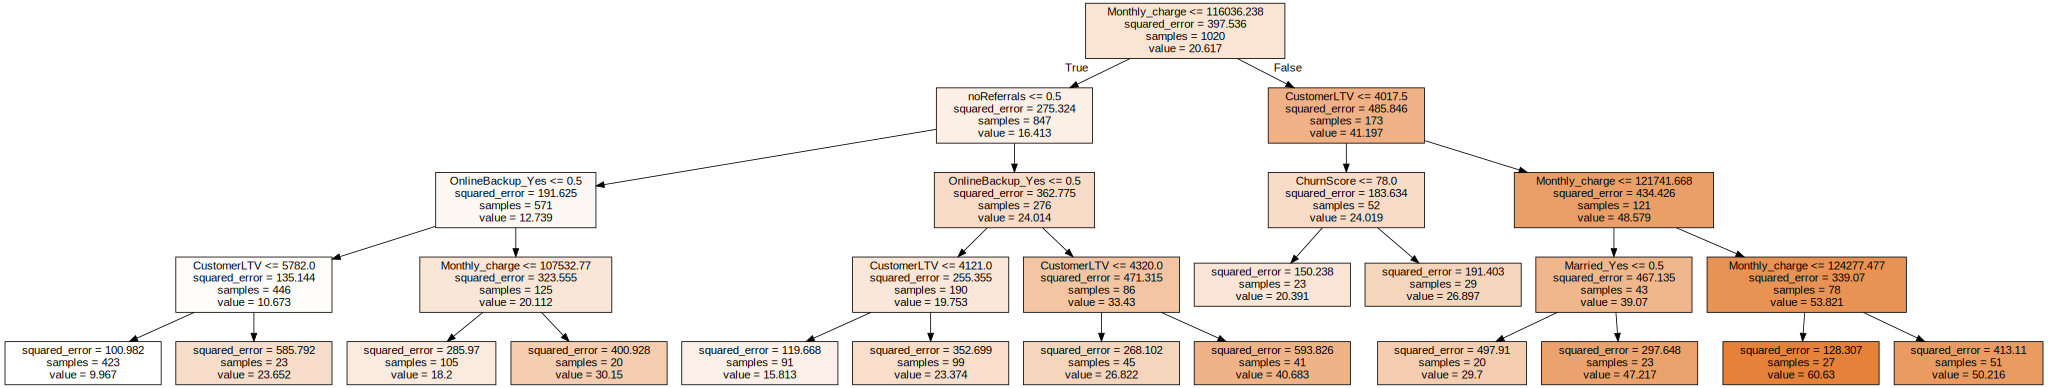

In [33]:
# 트리 모델을 tree_final.dot 파일로 저장 
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["churn", "active"],
                feature_names = v_feature_name, impurity = True, filled = True)
# graphviz를 이용해 트리 모델 시각화
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [34]:
#train data 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
#test data 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.441
Score on test set: 0.279


# RandomForest

In [35]:
rf_uncustomized = RandomForestRegressor(random_state = 42)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.913
Score on test set: 0.321


In [36]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
#n_estimatos: 트리 수 변경: 1~100
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
para_split = [n_split * 2 for n_split in range(2,21)]
para_depth = [depth for depth in range(1, 11)]

## Grid Search

In [37]:
estimator = RandomForestRegressor(random_state = 42)
#구하고자 하는 parameter와 범위
param_grid = {"n_estimators": para_n_tree ,"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}
#설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestRegressor(max_depth=4, min_samples_split=6, n_estimators=40,
                      random_state=42)

best parameter:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}

best score:
0.43


## 최종모델

In [102]:
rf_final = RandomForestRegressor(random_state = 42, n_estimators = 40, min_samples_leaf = 1,
                                 min_samples_split = 6, max_depth = 4)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.516
Score on test set: 0.361


## 시각화

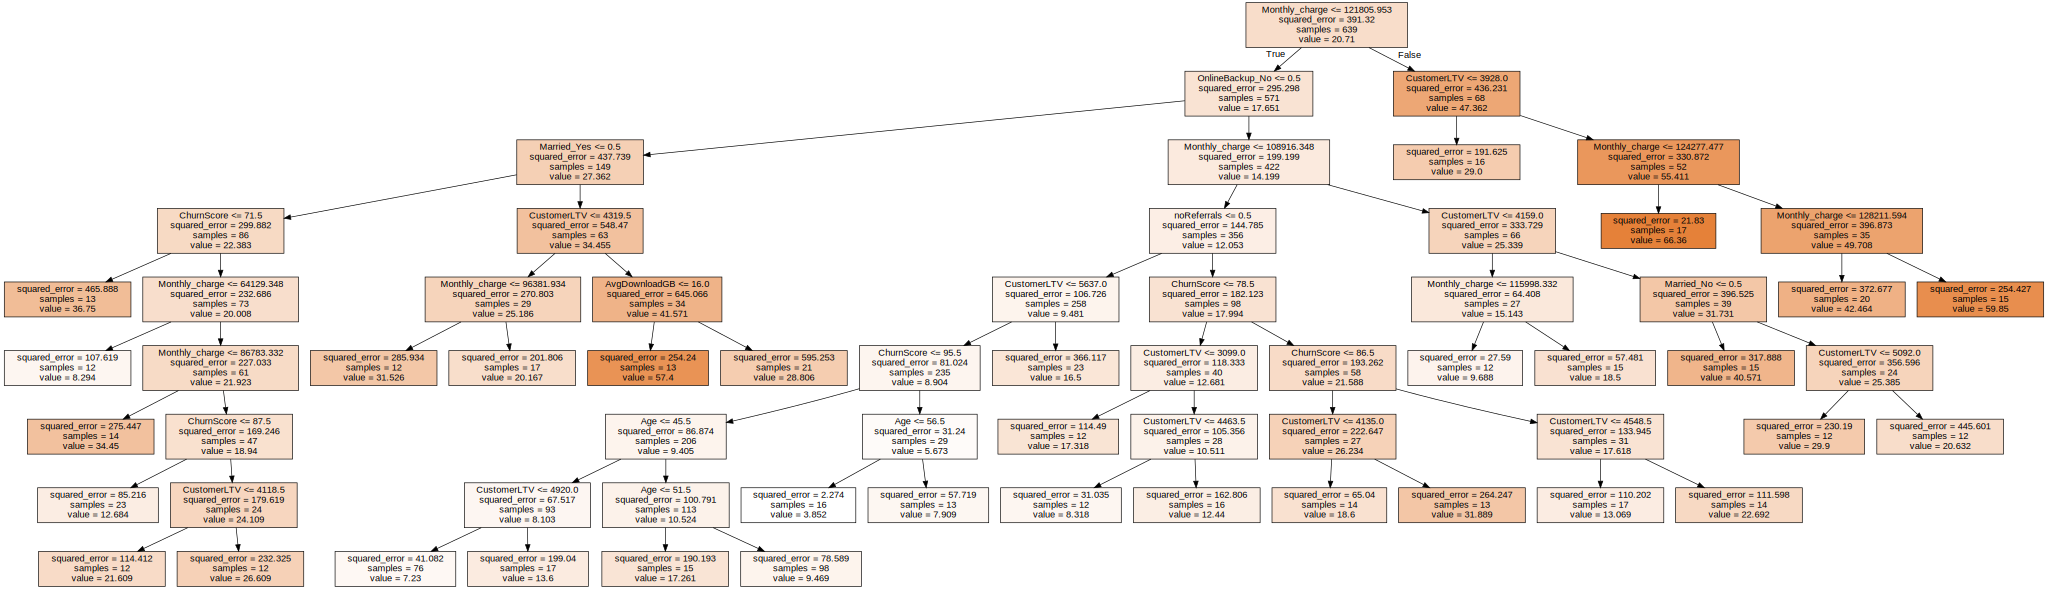

In [39]:
#변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file = "rfr_final_0.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
# tree_final_0.dot 그리기
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 중요도

In [40]:
#결론 도출
#feature_importances_: 설명변수의 중요도
#tee.feature_importances_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,Monthly_charge,0.517
1,CustomerLTV,0.211
5,noReferrals,0.056
6,OnlineBackup_No,0.055
8,Married_No,0.031
2,AvgDownloadGB,0.031
7,OnlineBackup_Yes,0.027
3,ChurnScore,0.025
4,Age,0.024
9,Married_Yes,0.024


Text(0, 0.5, '변수')

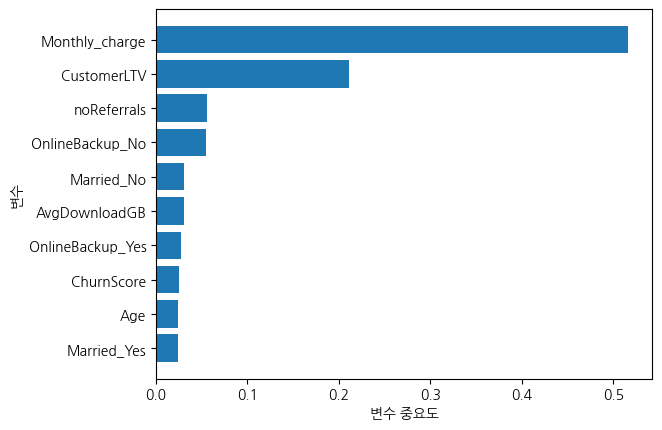

In [41]:
#설명변수 중요도 그래프 149 ~ 150p
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# Gradient Boost

In [42]:
#모델 생성: GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state = 42)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.673
Score on test set: 0.347


In [43]:
# n_estimatos  설정

train_score = []; test_score = []

para_n_tree = [n_tree *10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    

df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [44]:
# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.409,0.315
1,20,0.504,0.360
2,30,0.547,0.359
3,40,0.575,0.357
4,50,0.599,0.356
5,60,0.616,0.351
6,70,0.631,0.349
7,80,0.646,0.347
8,90,0.659,0.348
9,100,0.673,0.347


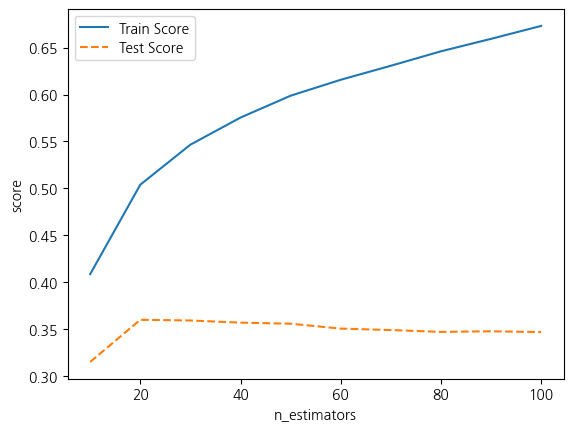

In [45]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [46]:
#편차가 가장 적은 지점인 n_estimatos=20 지점 선택 

In [47]:
#leaf 모델 성능을 비교

train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 20, min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [48]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.504,0.360
1,2,0.505,0.361
2,3,0.505,0.361
3,4,0.505,0.365
4,5,0.503,0.364
5,6,0.503,0.361
6,7,0.502,0.363
7,8,0.500,0.361
8,9,0.500,0.368
9,10,0.498,0.362


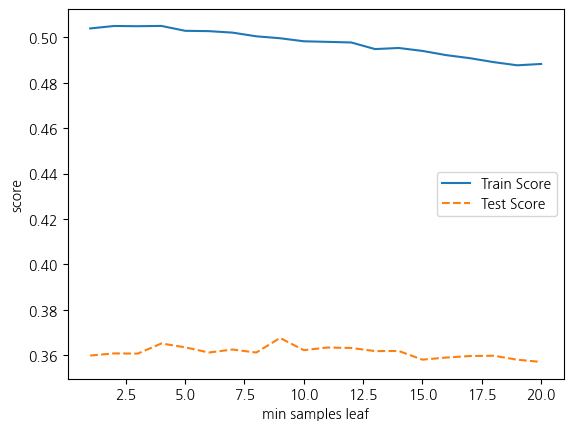

In [49]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [50]:
#편차가 가장 적은 leaf=9지점 선택

In [51]:
# min_sampels_split: 모델 성능을 비교

train_score = []; test_score = []

para_split = [n_split * 4 for n_split in range(1, 31)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 20, min_samples_leaf = 9, min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [52]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.500,0.368
1,8,0.500,0.368
2,12,0.500,0.368
3,16,0.500,0.368
4,20,0.500,0.368
5,24,0.500,0.368
6,28,0.497,0.366
7,32,0.497,0.365
8,36,0.497,0.365
9,40,0.497,0.365


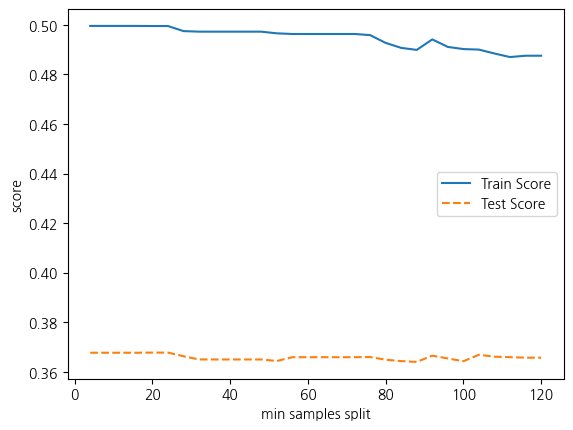

In [53]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [54]:
#min_samples_split=104

In [55]:
#max_depth 모델 성능을 비교한다

train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 20,min_samples_leaf = 9,max_depth = v_max_depth,\
                                  min_samples_split=104)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [56]:
# 모델 설명력 확인
df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.339,0.278
1,2,0.448,0.345
2,3,0.490,0.367
3,4,0.514,0.371
4,5,0.531,0.372
5,6,0.549,0.368
6,7,0.560,0.368
7,8,0.564,0.363
8,9,0.571,0.365
9,10,0.577,0.368


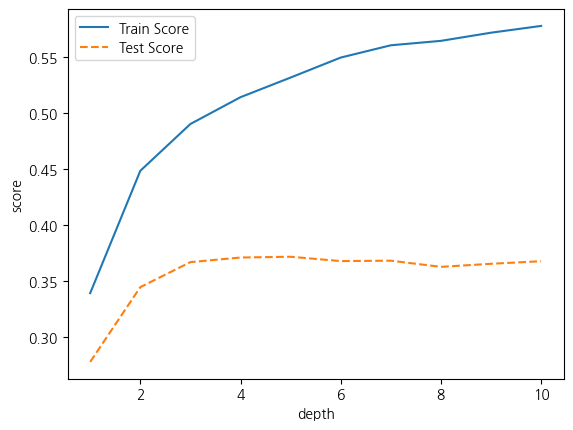

In [57]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()

In [58]:
#편차가 가장 적은 지점인 depth=5 선택

In [59]:
#learnin_rate 모델 성능을 비교한다

train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:

    gb = GradientBoostingRegressor(random_state = 42, n_estimators = 20,min_samples_leaf = 9,max_depth = 5, \
                                  min_samples_split=104, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
#결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

In [60]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.531,0.372
1,0.2,0.613,0.381
2,0.3,0.645,0.364
3,0.4,0.657,0.338
4,0.5,0.690,0.339
5,0.6,0.714,0.318
6,0.7,0.704,0.245
7,0.8,0.725,0.235
8,0.9,0.744,0.217


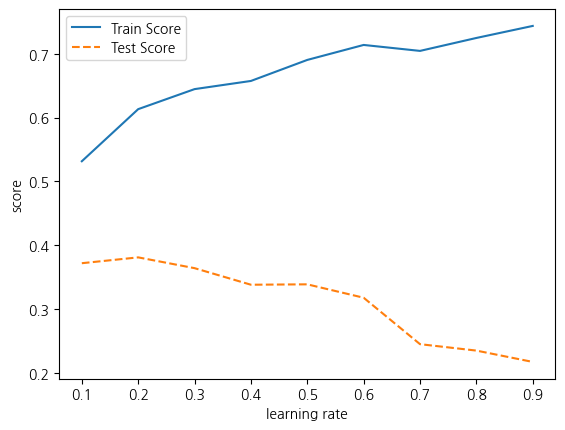

In [61]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

In [62]:
# 편차 적은 지점 0.2 픽

In [103]:
#최종 모델을 생성한다
gb_final = GradientBoostingRegressor(random_state = 42, n_estimators = 20, min_samples_leaf = 9, max_depth =5,\
                                     min_samples_split=104, learning_rate = 0.2)
gb_final.fit(df_train_x, df_train_y)


print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.613
Score on test set: 0.381


In [104]:
#Score on training set: 0.673
#Score on test set: 0.347

# 최종모델

## 종합분석

In [277]:
models = ['DecisionTree', 'RandomForest', 'GradientBoosting']
train_accuracy = []
test_accuracy = []
# 정확도 저장
mse, rmse, mae, mape = [], [], [], []

In [298]:
dt_model = DecisionTreeClassifier(random_state = 42, \
                                   max_depth = 4, \
                                   min_samples_leaf = 6, \
                                   min_samples_split = 38)
dt_model.fit(df_train_x, df_train_y)
print(dt_model.score(df_test_x, df_test_y))

0.11894273127753303


In [279]:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 40}

In [286]:
#의사결정나무 평가지표 저장

# 예측값
y_pred = dt_model.predict(df_test_x)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

#평가 넣기
mse.append(mean_squared_error(df_test_y,y_pred))
rmse.append(root_mean_squared_error(df_test_y,y_pred))
mae.append(mean_absolute_error(df_test_y,y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,y_pred))

In [287]:
#랜덤포레스트 최종 모델 생성
rf_model = RandomForestClassifier(random_state = 42, n_estimators = 40, min_samples_leaf = 1,
                                 min_samples_split = 6, max_depth = 4)

In [299]:
rf_model.fit(df_train_x, df_train_y)
# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
print(rf_model.score(df_test_x, df_test_y))

0.1395007342143906


In [283]:
#랜덤포레스트 평가지표 저장

# 예측값
y_pred = rf_model.predict(df_test_x)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

#평가 넣기
mse.append(mean_squared_error(df_test_y,y_pred))
rmse.append(root_mean_squared_error(df_test_y,y_pred))
mae.append(mean_absolute_error(df_test_y,y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,y_pred))


In [300]:
# 그래디언트 부스트 평가지표 저장
# 예측값
y_pred = gb_final.predict(df_test_x)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

#평가 넣기
mse.append(mean_squared_error(df_test_y,y_pred))
rmse.append(root_mean_squared_error(df_test_y,y_pred))
mae.append(mean_absolute_error(df_test_y,y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,y_pred))
print(gb_final.score(df_test_x, df_test_y))

0.3807702931973589


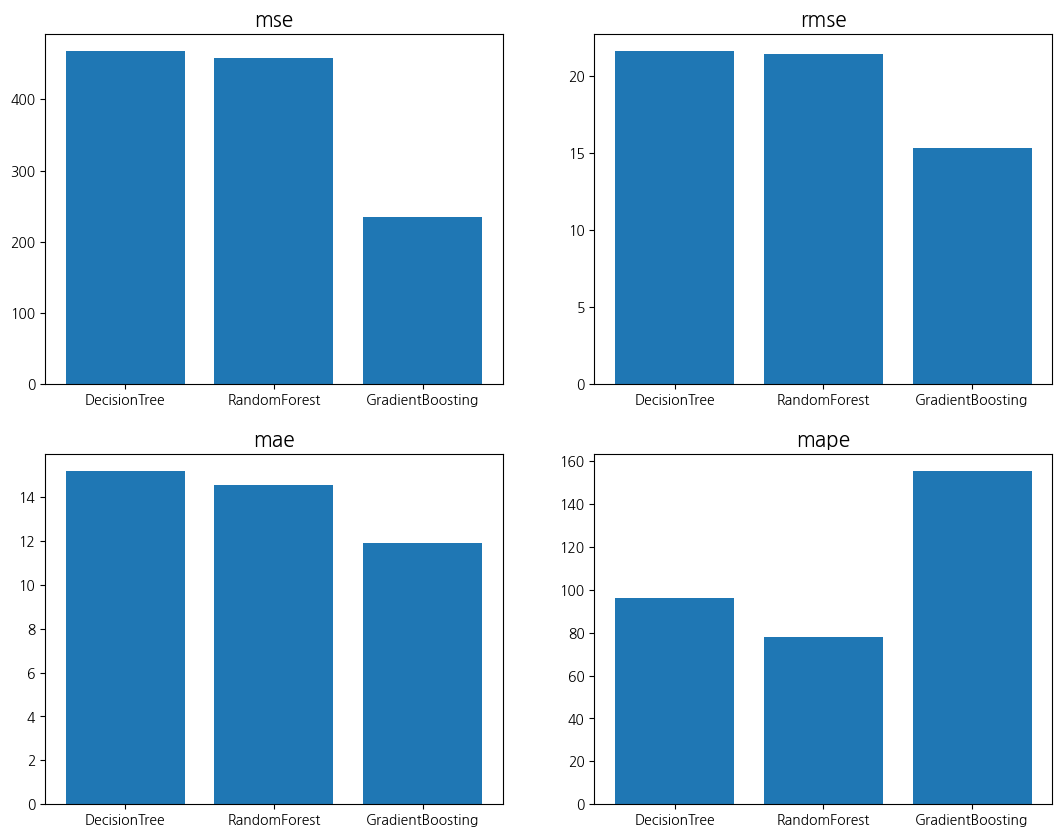

In [100]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title('mse').set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title('rmse').set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title('mae').set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title('mape').set_fontsize(15)

In [290]:
train_accuracy

[0.1607843137254902,
 0.22549019607843138,
 0.1607843137254902,
 0.1607843137254902,
 0.1607843137254902,
 0.22549019607843138,
 0.1607843137254902]

# 모델선정

mse, rmse, mae가 가장 낮은 `GB` 사용

# 이탈 고위험군 고객 데이터로 예측하기

In [190]:
#고위험군 고객 데이터 읽어오기
danger_cust = pd.read_csv('/home/piai/바탕화면/빅데이터 프로젝트/df_raw_chosen_danger_no_index.csv')
danger_cust

,Unnamed: 0,Monthly_charge,AvgDownloadGB,noReferrals,TechSupport,OnlineSecurity,ChurnLabel,Y_predict
0,9,106314.285714,14,3,Yes,Yes,0,1.0
1,14,52866.176471,19,0,Yes,Yes,0,1.0
2,16,71863.043478,20,0,Yes,Yes,0,1.0
3,22,96962.857143,30,1,No,No,0,1.0
4,43,52148.780488,21,0,Yes,Yes,0,1.0
...,...,...,...,...,...,...,...,...
440,5079,79831.578947,7,0,No,No,0,1.0
441,5082,96871.428571,11,0,No,No,0,1.0
442,5110,89646.666667,41,1,No,Yes,0,1.0
443,5131,104138.461538,19,0,No,No,0,1.0


In [191]:
gb_final

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=9,
                          min_samples_split=104, n_estimators=20,
                          random_state=42)

In [192]:
danger_cust = danger_cust.set_index(keys=['Unnamed: 0'], inplace = False, drop = True)
danger_cust

,Monthly_charge,AvgDownloadGB,noReferrals,TechSupport,OnlineSecurity,ChurnLabel,Y_predict
Unnamed: 0,,,,,,,
9,106314.285714,14,3,Yes,Yes,0,1.0
14,52866.176471,19,0,Yes,Yes,0,1.0
16,71863.043478,20,0,Yes,Yes,0,1.0
22,96962.857143,30,1,No,No,0,1.0
43,52148.780488,21,0,Yes,Yes,0,1.0
...,...,...,...,...,...,...,...
5079,79831.578947,7,0,No,No,0,1.0
5082,96871.428571,11,0,No,No,0,1.0
5110,89646.666667,41,1,No,Yes,0,1.0


In [193]:
danger_cust.index

Int64Index([   9,   14,   16,   22,   43,   50,   55,   63,   67,   93,
            ...
            5035, 5046, 5050, 5054, 5061, 5079, 5082, 5110, 5131, 5132],
           dtype='int64', name='Unnamed: 0', length=445)

설명변수 빠진거 채워야함

In [206]:
#raw_df에서 같은 인덱스를 찾는다
danger_cust = df_raw.loc[danger_cust.index]

In [212]:
danger_cust = danger_cust[['Monthly_charge', 'CustomerLTV', 'AvgDownloadGB', 'ChurnScore', 'Age', 'noReferrals', 'OnlineBackup', 'Married']]

In [217]:
danger_cust_dummy = pd.get_dummies(danger_cust)

In [218]:
danger_cust_dummy

,Monthly_charge,CustomerLTV,AvgDownloadGB,ChurnScore,Age,noReferrals,OnlineBackup_No,OnlineBackup_Yes,Married_No,Married_Yes
Unnamed: 0,,,,,,,,,,
9,106314.285714,5509,14,25,43,3,0,1,0,1
14,52866.176471,5795,19,37,39,0,0,1,1,0
16,71863.043478,3607,20,37,52,0,1,0,0,1
22,96962.857143,3585,30,78,30,1,1,0,0,1
43,52148.780488,3290,21,73,57,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
5079,79831.578947,4615,7,37,67,0,0,1,1,0
5082,96871.428571,5212,11,70,52,0,1,0,1,0
5110,89646.666667,4809,41,39,25,1,1,0,0,1


In [220]:
danger_cust['predict_tenure_month'] = gb_final.predict(danger_cust_dummy)

In [222]:
df_raw

,CustomerId,Gender,Age,AgeGroup,Married,Dependents,noDependents,Referrals,noReferrals,PaperlessBilling,...,ChurnReason,CustomerLTV,SatisScore,TotalExtraDataCharge,AvgRoamCharge,TotalRoamCharge,Tenure_month,Sum_charge,Monthly_charge,ReasonCategory
0,C-10001,여성,37,30대,Yes,No,0,Yes,2,Yes,...,NaN,2205,3,0,47910,431100,21,1755400,83590.476190,NaN
1,C-10002,남성,46,40대,No,No,0,No,0,No,...,NaN,5414,5,11300,12090,108710,21,1447500,68928.571429,NaN
2,C-10003,남성,50,50대,No,No,0,No,0,Yes,...,Price too high,4479,1,0,38080,152100,5,490900,98180.000000,Price
3,C-10004,남성,78,70대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,3714,1,0,31410,408720,14,1578400,112742.857143,PS
4,C-10005,여성,75,70대,Yes,No,0,Yes,3,Yes,...,Network reliability,3464,1,0,8360,24970,4,378000,94500.000000,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6854,C-17039,여성,20,20대,No,No,0,No,0,No,...,NaN,3161,4,0,52770,685680,25,1610700,64428.000000,NaN
6855,C-17040,남성,40,40대,Yes,No,0,Yes,1,Yes,...,Product dissatisfaction,5248,1,0,18310,402730,23,2343500,101891.304348,PS
6856,C-17041,남성,22,20대,No,No,0,No,0,Yes,...,NaN,5870,5,0,21020,42040,14,792400,56600.000000,NaN
6857,C-17042,남성,21,20대,No,No,0,Yes,5,No,...,NaN,4792,3,0,2370,160460,79,6328500,80107.594937,NaN


In [224]:
danger_cust

,Monthly_charge,CustomerLTV,AvgDownloadGB,ChurnScore,Age,noReferrals,OnlineBackup,Married,predict_tenure_month
Unnamed: 0,,,,,,,,,
9,106314.285714,5509,14,25,43,3,Yes,Yes,44.752811
14,52866.176471,5795,19,37,39,0,Yes,No,10.908696
16,71863.043478,3607,20,37,52,0,No,Yes,10.296415
22,96962.857143,3585,30,78,30,1,No,Yes,15.178761
43,52148.780488,3290,21,73,57,0,Yes,No,11.489313
...,...,...,...,...,...,...,...,...,...
5079,79831.578947,4615,7,37,67,0,Yes,No,22.139139
5082,96871.428571,5212,11,70,52,0,No,No,10.556421
5110,89646.666667,4809,41,39,25,1,No,Yes,22.291473


In [228]:
danger_cust = pd.merge(danger_cust, df_raw, left_index = True, right_index = True, how = 'left')

In [246]:
Endman= danger_cust[['CustomerId', 'Tenure_month', 'predict_tenure_month']]

In [247]:
Endman['predict_tenure_month'] = Endman['predict_tenure_month'].round(1)

In [248]:
Endman = Endman[Endman['Tenure_month'] < Endman['predict_tenure_month']]

In [249]:
Endman['Predict_end_period'] = Endman['predict_tenure_month'] - Endman['Tenure_month']

In [301]:
a = pd.merge(Endman, df_raw, left_index = True, right_index = True, how = 'left')

In [303]:
a.to_csv('이탈시기예측.csv')

In [252]:
danger_cust_dummy

,Monthly_charge,CustomerLTV,AvgDownloadGB,ChurnScore,Age,noReferrals,OnlineBackup_No,OnlineBackup_Yes,Married_No,Married_Yes
Unnamed: 0,,,,,,,,,,
9,106314.285714,5509,14,25,43,3,0,1,0,1
14,52866.176471,5795,19,37,39,0,0,1,1,0
16,71863.043478,3607,20,37,52,0,1,0,0,1
22,96962.857143,3585,30,78,30,1,1,0,0,1
43,52148.780488,3290,21,73,57,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
5079,79831.578947,4615,7,37,67,0,0,1,1,0
5082,96871.428571,5212,11,70,52,0,1,0,1,0
5110,89646.666667,4809,41,39,25,1,1,0,0,1


# 고객 예시

## LTV, ChurnScore

In [271]:
real_df['CustomerLTV'] = [4000,5000]
real_df['ChurnScore'] = [10,10]

LTV와 ChurnScore는 계산식이 나오지않아 알 수 없으므로 현 데이터에서 나온 가장 유사한 것으로 지정

## 고객 예시 정보 입력

In [270]:
real_df = pd.DataFrame()
real_df['Monthly_charge'] = [78000]
real_df['AvgDownloadG'] = [100]
real_df['Age'] = [27]
real_df['noReferrals'] = [0]
real_df['OnlineBackup_No'] = [0]
real_df['OnlineBackup_Yes'] = [1]
real_df['Married_No'] = [1]
real_df['Married_Yes'] = [0]

In [272]:
gb_final.predict(real_df).round(2)

array([22.28, 18.91])

In [262]:
real_df

,Monthly_charge,CustomerLTV,AvgDownloadG,ChurnScore,Age,noReferrals,OnlineBackup_No,OnlineBackup_Yes,Married_No,Married_Yes
0,78000,4000,100,10,27,0,0,1,1,0
1,10000,5000,4,10,58,0,1,0,0,1


In [274]:
df_train_x.columns

Index(['Monthly_charge', 'CustomerLTV', 'AvgDownloadGB', 'ChurnScore', 'Age',
       'noReferrals', 'OnlineBackup_No', 'OnlineBackup_Yes', 'Married_No',
       'Married_Yes'],
      dtype='object')

In [276]:
test_accuracy

[0.11894273127753303,
 0.1395007342143906,
 0.11894273127753303,
 0.11894273127753303]